# <span style="color:darkblue"> Lecture 13 - Aggregating Data </span>

<font size = "5">

In the previous class we covered

- Missing values
- The basics of data cleaning

This class we will talk about 
- Computing aggregate statistics by group
- Introduction to merging

# <span style="color:darkblue"> I. Import Libraries and Data </span>


<font size = "5">
Key libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<font size = "5">

Read dataset on car racing circuits

- https://en.wikipedia.org/wiki/Formula_One <br>
- [See Data Source](https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020)

In [3]:
results = pd.read_csv("data_raw/results.csv")

<font size = "5">

The dataset "codebook" is a table with ...

- Key column information
- Main things:  Field, Type, Key, and Description

<img src="figures/codebook_races.png" alt="drawing" width="600"/>


In [4]:
# The codebook contains basic about the columns
# "Field" is the name given to the name of the column
# "Type"  is the variable type:
#         integer (int)
#         string (varchar - "variable character")
#         float (float)
#         The number in parenthesis is the maximum number of characters/digits
#         For most purposes we can ignore the numbers in parentheses.
# "Key" denotes whether this is the primary key "PRI" (also known as the identifier)
#         This is a column with unique values, that uniquely identifies each row
# "Description" contains a label with the content of the variable

# Primary key is unique identifier for this table/data 

<font size = "5">

Get column names + types

- Do types match the codebook?
- If not the data may need to be cleaned

In [5]:
# This code displays column types
# "int" or "float" objects are numneric
# "object" typically denotes strings
# If a column that's supposed to be "numeric" but appears as "object"
# then it needs to be cleaned and converted to numeric 

results.dtypes


resultId             int64
raceId               int64
driverId             int64
constructorId        int64
number              object
grid                 int64
position            object
positionText        object
positionOrder        int64
points             float64
laps                 int64
time                object
milliseconds        object
fastestLap          object
rank                object
fastestLapTime      object
fastestLapSpeed     object
statusId             int64
dtype: object

<font size = "5">

Try it yourself!

- How many rows does the dataset have?
- How many unique values are there for the columns <br>
$\qquad$ "resultId"? <br>
$\qquad$ "raceId"? <br>
$\qquad$ "driverId"? <br>

HINT: Use the "len()" and the "pd.unique()" functions

In [6]:
# Write your own code here

print(len(results))
# can also look at the data table 

results['resultId'].unique()

print(len(results['resultId'].unique()))

print(len(results['raceId'].unique()))

25840
25840
1079


In [7]:
results

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25835,25841,1096,854,210,47,12,16,16,16,0.0,57,\N,\N,39,12,1:29.833,211.632,11
25836,25842,1096,825,210,20,16,17,17,17,0.0,57,\N,\N,40,20,1:31.158,208.556,11
25837,25843,1096,1,131,44,5,18,18,18,0.0,55,\N,\N,42,11,1:29.788,211.738,9
25838,25844,1096,849,3,6,20,19,19,19,0.0,55,\N,\N,45,14,1:30.309,210.517,130


# <span style="color:darkblue"> II. Aggregate + groupby  </span>



<font size = "5">

Splitting code into multiple lines

- Makes it easier to read
- Simply wrap the code in round parentheses "()"

In [8]:
# The following code computes descriptive statistics for points 
# Wrapping the code in parentheses "()" allows you to split it into multiple 
# lines. It's considered good practice to make each line less than 80 characters
# This makes it easier to scroll up and down without going sideways.

descriptives_singleline = results["points"].describe()
descriptives_multiline = (results["points"]
                          .describe())

# Use parentheses to split via lines - wrap in () and hit ENTER
# Code will not work if do not use () 
# red line indicates error 

# describe only calculates a certain set of stats, might want others

<font size = "5">

Aggregate statistics 

In [9]:
# The ".agg()" subfunction computes aggregate statistics
# The syntax is ("column_name","function_name")
# The first argument is the column name
# The second argument is the function_name
# The command works with single quotations '...' or double "..."

results_agg = results.agg(mean_points = ('points','mean'),
                          sd_points =   ('points','std'),
                          min_points =  ('points','min'),
                          max_points =  ('points','max'),
                          count_obs   = ('points',len))

display(results_agg)

# has to be a python function for it to work
# will learn how to do with own functions later
# some agg functions do NOT use quotations - ie. len

,points
mean_points,1.877053
sd_points,4.169849
min_points,0.000000
max_points,50.000000
count_obs,25840.000000


<font size = "5" >

Groupby + Aggregate statistics

<img src="figures/agg.png" alt="drawing" width="400"/>

In [10]:
# In this cases drivers engage in multiple car races
# We can compute the aggregate statistics for each specific driver across
# multiple car races

drivers_agg = (results.groupby("driverId")
                      .agg(mean_points = ('points','mean'),
                           sd_points =   ('points','std'),
                           min_points =  ('points','min'),
                           max_points =  ('points','max'),
                           count_obs   = ('points',len)))

len(drivers_agg)
drivers_agg

,mean_points,sd_points,min_points,max_points,count_obs
driverId,,,,,
1,14.182258,9.224098,0.0,50.0,310
2,1.407609,2.372923,0.0,15.0,184
3,7.740291,8.672456,0.0,25.0,206
4,5.756983,6.330721,0.0,25.0,358
5,0.937500,1.969503,0.0,10.0,112
...,...,...,...,...,...
852,1.000000,2.477808,0.0,12.0,44
853,0.000000,0.000000,0.0,0.0,22
854,0.272727,1.335798,0.0,8.0,44


In [11]:
# subset database to only get rows associated with driverId 1

driverId_1=results.query('driverId==1')
driverId_1

# driver 1 has competed in 310 races 

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
26,27,19,1,1,22,9,5,5,5,4.0,56,+46.548,5525103,53,3,1:35.462,209.033,1
56,57,20,1,1,22,3,13,13,13,0.0,56,\N,\N,25,19,1:35.520,203.969,11
68,69,21,1,1,22,5,3,3,3,6.0,66,+4.187,5903238,20,3,1:22.017,204.323,1
89,90,22,1,1,22,3,2,2,2,8.0,58,+3.779,5213230,31,2,1:26.529,222.085,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25744,25750,1092,1,131,44,6,5,5,5,10.0,28,+40.326,10944330,11,7,1:45.530,198.097,1
25761,25767,1093,1,131,44,3,2,2,2,18.0,56,+5.023,6136710,45,5,1:39.830,198.805,1
25781,25787,1094,1,131,44,3,2,2,2,18.0,71,+15.186,5931915,32,5,1:22.062,188.813,1
25801,25807,1095,1,131,44,2,2,2,2,18.0,71,+1.529,5915573,63,2,1:13.942,209.791,1


In [12]:
results.loc[results['driverId']==1, ["points"]]

# another way to extract a specific driverId and
# a specific column of data you want 
# essentially what agg is doing for each driver 

,points
0,10.0
26,4.0
56,0.0
68,6.0
89,8.0
...,...
25744,10.0
25761,18.0
25781,18.0
25801,18.0


In [13]:
results.loc[results['driverId']==1, ["points"]].mean()

# mean for this specific driver for this column 
# agg finds this for ALL with grouping by driverId

points    14.182258
dtype: float64

<font size = "5" >
Groupby + Aggregate statistics (multigroup)

In [14]:
# We can aggregate statistics from multiple columns by
# entering a list of column names in "groupby"
# In this case "constructor" in this case denotes the team 
# The following computes aggregate point stats for each (team, race) combination

teamrace_agg = (results.groupby(["raceId","constructorId"])
                       .agg(mean_points = ('points','mean'),
                            sd_points =   ('points','std'),
                            min_points =  ('points','min'),
                            max_points =  ('points','max'),
                            count_obs   = ('points',len)))

len(teamrace_agg)

12568

In [15]:
teamrace_agg

mean_points  sd_points  min_points  max_points  \
raceId constructorId                                                   
1      1                      0.0   0.000000         0.0         0.0   
       2                      0.0   0.000000         0.0         0.0   
       3                      1.5   2.121320         0.0         3.0   
       4                      2.0   2.828427         0.0         4.0   
       5                      1.5   0.707107         1.0         2.0   
...                           ...        ...         ...         ...   
1096   117                    2.5   2.121320         1.0         4.0   
       131                    5.0   7.071068         0.0        10.0   
       210                    0.0   0.000000         0.0         0.0   
       213                    0.0   0.000000         0.0         0.0   
       214                    3.0   4.242641         0.0         6.0   

                      count_obs  
raceId constructorId             
1      1                      2  
       2                      2  
       3                      2  
       4                      2  
       5                      2  
...                         ...  
1096   117                    2  
       131                    2  
       210                    2  
       213                    2  
       214                    2  

[12568 rows x 5 columns]

<font size = "5">

Filtering + Grouping + Aggregating: <br>

```python 
.query().groupby().agg()
```

- This sequential syntax is known as "chaining"


In [16]:
# The following gets a subset of the data using .query()
# In this case we subset the data before computing aggregate statistics
# Note: "filtering" is often the word used to obtain a subset

teamrace_agg = (results.query("raceId >= 500")
                       .groupby(["raceId","constructorId"])
                        .agg(mean_points = ('points','mean'),
                             sd_points =   ('points','std'),
                             min_points =  ('points','min'),
                             max_points =  ('points','max'),
                             count_obs   = ('points',len)))

# query creates subset 
# must specify stats we want to calc -> use agg 


<font size = "5">

Try it yourself!

- Create a new dataset by chaining that <br>
groups by "raceId" then computes the <br>
aggregate statistics: "points" average <br> and "laps" average


In [17]:
# Write your own code

points_laps = (results.groupby('raceId')
               .agg(points_av = ('points','mean'),
                    laps_av = ('laps','mean')))

points_laps

,points_av,laps_av
raceId,,
1,1.950,50.25
2,0.975,27.70
3,1.950,51.15
4,1.950,56.25
5,1.950,47.10
...,...,...
1092,5.050,25.20
1093,5.100,49.50
1094,5.100,68.90


In [18]:
points_laps = (results.groupby('raceId', as_index=False)
               .agg(points_av = ('points','mean'),
                    laps_av = ('laps','mean')))

points_laps

# as_index keeps raceId as a column 

,raceId,points_av,laps_av
0,1,1.950,50.25
1,2,0.975,27.70
2,3,1.950,51.15
3,4,1.950,56.25
4,5,1.950,47.10
...,...,...,...
1074,1092,5.050,25.20
1075,1093,5.100,49.50
1076,1094,5.100,68.90
1077,1095,5.100,62.80


<font size = "5">

Try it yourself!

- Create a new dataset by chaining that <br>
groups by "constructorId" (the team) then <br> 
computes the average number of "points"
- Add a chain ".sort_values(...,ascending = False)" <br>
to sort by team points in desceding order


In [19]:
# Write your own code

(results.groupby('constructorId',as_index=False)
.agg(points_mean = ('points','mean')).sort_values(by = "points_mean", 
                                                  ascending = False))


,constructorId,points_mean
128,131,12.363643
8,9,9.117816
22,23,5.058824
204,208,4.584416
5,6,4.317968
...,...,...
81,83,0.000000
82,84,0.000000
83,85,0.000000
84,86,0.000000


# <span style="color:darkblue"> III. Relative statistics within group </span>



<font size = "5">

Merging

<img src="figures/merge_stats.png" alt="drawing" width="600"/>


In [20]:
# This command merges the "aggregate" information in "driver_agg" into
# "results" as shown in the figure
# The merging variable "on" is determined by "driverId", which is a column
# that is common to both datasets
# "how = left" indicates that the left dataset is the baseline
#
# Note: For this method to work well "driverId" needs to contain unique alues
# in "drivers_agg". If not you may need to clean the data beforehand

results_merge = pd.merge(results,
                         drivers_agg,
                         on = "driverId",
                         how = "left")

results_merge



,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,mean_points,sd_points,min_points,max_points,count_obs
0,1,18,1,1,22,1,1,1,1,10.0,...,39,2,1:27.452,218.300,1,14.182258,9.224098,0.0,50.0,310
1,2,18,2,2,3,5,2,2,2,8.0,...,41,3,1:27.739,217.586,1,1.407609,2.372923,0.0,15.0,184
2,3,18,3,3,7,7,3,3,3,6.0,...,41,5,1:28.090,216.719,1,7.740291,8.672456,0.0,25.0,206
3,4,18,4,4,5,11,4,4,4,5.0,...,58,7,1:28.603,215.464,1,5.756983,6.330721,0.0,25.0,358
4,5,18,5,1,23,3,5,5,5,4.0,...,43,1,1:27.418,218.385,1,0.937500,1.969503,0.0,10.0,112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25835,25841,1096,854,210,47,12,16,16,16,0.0,...,39,12,1:29.833,211.632,11,0.272727,1.335798,0.0,8.0,44
25836,25842,1096,825,210,20,16,17,17,17,0.0,...,40,20,1:31.158,208.556,11,1.260563,2.771894,0.0,18.0,142
25837,25843,1096,1,131,44,5,18,18,18,0.0,...,42,11,1:29.788,211.738,9,14.182258,9.224098,0.0,50.0,310
25838,25844,1096,849,3,6,20,19,19,19,0.0,...,45,14,1:30.309,210.517,130,0.147541,0.813143,0.0,6.0,61


<font size = "5">

Check out another approach to compute <br>
aggregate statistics using ``` .transform() ```<br>
 in the optional lecture!

<font size = "5">

Try it yourself!

- Compute a scatter plot with ...
- "points" (y-axis) vs "mean_points" (x-axis)

Note: This plots tells you how much a driver's <br>
performance on individual races deviates from <br>
their overall average

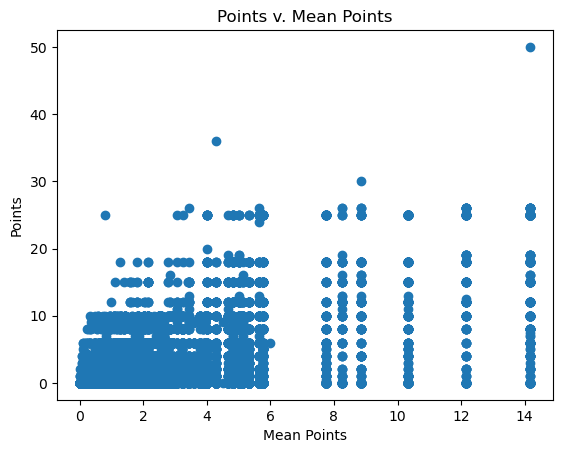

In [23]:
# Write your own code

plt.scatter(x=results_merge['mean_points'], y=results_merge['points'])
plt.xlabel("Mean Points")
plt.ylabel("Points")
plt.title("Points v. Mean Points")
plt.show()

<font size = "5">

Try it yourself!

- Merge the "teamrace_agg" data into "results"
- This time use the option:

$\qquad$ ```on = ["raceId","constructorId"]```

In [26]:
# Write your own code

results_merge = pd.merge(results,
                         drivers_agg,
                         on = "driverId",
                         how = "left")

new_merge = pd.merge(results,
                     teamrace_agg, 
                     on = ["raceId","constructorId"],
                     how = "left")

new_merge

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,mean_points,sd_points,min_points,max_points,count_obs
0,1,18,1,1,22,1,1,1,1,10.0,...,39,2,1:27.452,218.300,1,NaN,NaN,NaN,NaN,NaN
1,2,18,2,2,3,5,2,2,2,8.0,...,41,3,1:27.739,217.586,1,NaN,NaN,NaN,NaN,NaN
2,3,18,3,3,7,7,3,3,3,6.0,...,41,5,1:28.090,216.719,1,NaN,NaN,NaN,NaN,NaN
3,4,18,4,4,5,11,4,4,4,5.0,...,58,7,1:28.603,215.464,1,NaN,NaN,NaN,NaN,NaN
4,5,18,5,1,23,3,5,5,5,4.0,...,43,1,1:27.418,218.385,1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25835,25841,1096,854,210,47,12,16,16,16,0.0,...,39,12,1:29.833,211.632,11,0.0,0.000000,0.0,0.0,2.0
25836,25842,1096,825,210,20,16,17,17,17,0.0,...,40,20,1:31.158,208.556,11,0.0,0.000000,0.0,0.0,2.0
25837,25843,1096,1,131,44,5,18,18,18,0.0,...,42,11,1:29.788,211.738,9,5.0,7.071068,0.0,10.0,2.0
25838,25844,1096,849,3,6,20,19,19,19,0.0,...,45,14,1:30.309,210.517,130,0.0,0.000000,0.0,0.0,2.0
